In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:,[2,3]]
y = iris.target

In [3]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(x,y)

In [29]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

In [33]:
def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

In [34]:
draw_decision_tree(tree1)

TypeError: 'Dot' object does not support indexing

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

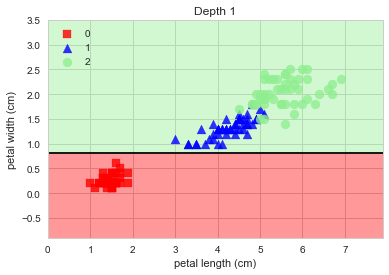

In [32]:
plot_decision_regions(x, y, tree1, "Depth 1")

In [35]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [37]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

In [38]:
draw_decision_tree(tree1)

TypeError: 'Dot' object does not support indexing

In [ ]:
dot_buf = io.StringIO() 
export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 

In [45]:
graph = pydot.graph_from_dot_data(dot_buf.getvalue())

In [46]:
graph.create_png()

InvocationException: GraphViz's executables not found